# Various Imports

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import keras
import pandas as pd
import cv2
import matplotlib.image as mpimg

# Load Data

In [9]:
data = pd.read_csv('/home/ramdoot/datasets/self-driving-car/driving_log.csv', 
                   sep=',', 
                   error_bad_lines=False, 
                   header=None,
                   names=["Center", "Left", "Right", "Steering Angle", "Throttle", "Brake","Speed", "cc"])[:-100]

data["Steering Angle"] = data["Steering Angle"].astype(float)
data.head()

,Center,Left,Right,Steering Angle,Throttle,Brake,Speed,cc
0,/home/ramdoot/datasets/self-driving-car/IMG/ce...,/home/ramdoot/datasets/self-driving-car/IMG/le...,/home/ramdoot/datasets/self-driving-car/IMG/ri...,0.0,0,0,2,0.917455
1,/home/ramdoot/datasets/self-driving-car/IMG/ce...,/home/ramdoot/datasets/self-driving-car/IMG/le...,/home/ramdoot/datasets/self-driving-car/IMG/ri...,0.0,0,0,7,0.754701
2,/home/ramdoot/datasets/self-driving-car/IMG/ce...,/home/ramdoot/datasets/self-driving-car/IMG/le...,/home/ramdoot/datasets/self-driving-car/IMG/ri...,0.0,0,0,1,1.812430
3,/home/ramdoot/datasets/self-driving-car/IMG/ce...,/home/ramdoot/datasets/self-driving-car/IMG/le...,/home/ramdoot/datasets/self-driving-car/IMG/ri...,0.0,0,0,1,3.340240
4,/home/ramdoot/datasets/self-driving-car/IMG/ce...,/home/ramdoot/datasets/self-driving-car/IMG/le...,/home/ramdoot/datasets/self-driving-car/IMG/ri...,0.0,0,0,2,0.454340


## Fix random commas

In [14]:
def fix_speed(row):
    row[6] = float(str(row[6]) + '.' + str(row[7]).replace('.', ''))
    return row

data = data.apply(fix_speed, axis=1)

In [15]:
data.head()

,Center,Left,Right,Steering Angle,Throttle,Brake,Speed,cc
0,/home/ramdoot/datasets/self-driving-car/IMG/ce...,/home/ramdoot/datasets/self-driving-car/IMG/le...,/home/ramdoot/datasets/self-driving-car/IMG/ri...,0.0,0,0,2.091746,0.917455
1,/home/ramdoot/datasets/self-driving-car/IMG/ce...,/home/ramdoot/datasets/self-driving-car/IMG/le...,/home/ramdoot/datasets/self-driving-car/IMG/ri...,0.0,0,0,7.075470,0.754701
2,/home/ramdoot/datasets/self-driving-car/IMG/ce...,/home/ramdoot/datasets/self-driving-car/IMG/le...,/home/ramdoot/datasets/self-driving-car/IMG/ri...,0.0,0,0,1.181243,1.812430
3,/home/ramdoot/datasets/self-driving-car/IMG/ce...,/home/ramdoot/datasets/self-driving-car/IMG/le...,/home/ramdoot/datasets/self-driving-car/IMG/ri...,0.0,0,0,1.334024,3.340240
4,/home/ramdoot/datasets/self-driving-car/IMG/ce...,/home/ramdoot/datasets/self-driving-car/IMG/le...,/home/ramdoot/datasets/self-driving-car/IMG/ri...,0.0,0,0,2.045434,0.454340


In [16]:
data.describe()

,Steering Angle,Throttle,Brake,Speed,cc
count,10804.000000,1.080400e+04,1.080400e+04,1.080400e+04,10804.000000
mean,-0.000740,1.747886e+06,9.367507e+03,8.577859e+03,8302.580116
std,0.040812,2.673804e+06,2.446278e+05,2.431006e+05,13771.470880
min,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,1.000000e+00,0.000000e+00,3.000000e-01,30.000000
50%,0.000000,1.000000e+00,1.000000e+00,3.000000e-01,30.000000
75%,0.000000,2.816901e+06,1.000000e+00,3.019027e+01,19012.000000
max,1.000000,9.859154e+06,9.658113e+06,9.978483e+06,640407.000000


# Image plotting

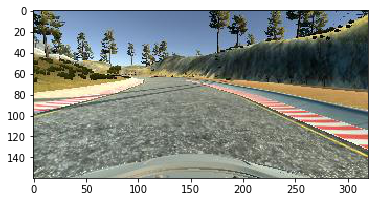

In [17]:
img = mpimg.imread(data['Center'][50])

plt.imshow(img)
plt.show()

# Loading the images into the Dataframe

In [18]:
data['Center'] = data['Center'].apply(lambda x: mpimg.imread(x))
data['Left'] = data['Left'].apply(lambda x: mpimg.imread(x))
data['Right'] = data['Right'].apply(lambda x: mpimg.imread(x))

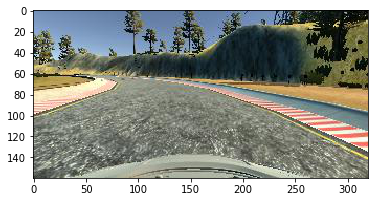

In [19]:
plt.imshow(data['Center'][0])
plt.show()

# Splitting into X and Y
### + 0.20 on left images angles
### - 0.20 on right images angles

In [20]:
images = []
angles = []

for img, angle in zip(data['Center'], data['Steering Angle']):
    images.append(img)
    angles.append(angle)
    
for img, angle in zip(data['Left'], data['Steering Angle']):
    images.append(img)
    angles.append(angle+0.20)
    
for img, angle in zip(data['Right'], data['Steering Angle']):
    images.append(img)
    angles.append(angle-0.20)
    
X = np.array(images)
Y = np.array(angles)

In [21]:
X.shape

(32412, 160, 320, 3)

In [22]:
Y.shape

(32412,)

# Spliting into training and testing sets

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

print("Train len: {} | Test len: {}".format(len(y_train), len(y_test)))

Train len: 29170 | Test len: 3242


# Dummy Model

In [14]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Input
from keras.optimizers import Adam

model = Sequential()

model.add(Flatten(input_shape=[160, 320, 3]))
model.add(Dense(2, activation='relu'))
model.add(Dense(1))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 153600)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 307202    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 307,205
Trainable params: 307,205
Non-trainable params: 0
_________________________________________________________________


### Training

In [16]:
model.compile('adam', loss="mean_squared_error", metrics=["mae"])

model.fit(X_train, y_train, epochs=4, validation_split=0.09)

Train on 8392 samples, validate on 831 samples
Epoch 1/4
8392/8392 [==============================] - 4s - loss: 6.2104 - mean_absolute_error: 0.2223 - val_loss: 0.0277 - val_mean_absolute_error: 0.1399
Epoch 2/4
8392/8392 [==============================] - 3s - loss: 0.0265 - mean_absolute_error: 0.1341 - val_loss: 0.0277 - val_mean_absolute_error: 0.1396
Epoch 3/4
8392/8392 [==============================] - 3s - loss: 0.0265 - mean_absolute_error: 0.1338 - val_loss: 0.0277 - val_mean_absolute_error: 0.1393
Epoch 4/4
8392/8392 [==============================] - 3s - loss: 0.0265 - mean_absolute_error: 0.1335 - val_loss: 0.0277 - val_mean_absolute_error: 0.1391


 ### Evaluation

In [17]:
predictions = model.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, predictions)

0.13608208571392591

### Saving

In [19]:
model.save("dummy_model.h5")

# CNN

In [36]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Input
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Activation

inputs = Input([160, 320, 3])

keep_prob = 1

x = Conv2D(32, 7, activation=None)(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(keep_prob)(x)
x = MaxPool2D((2,2))(x)

x = Conv2D(64, 3, activation=None)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(keep_prob)(x)
x = MaxPool2D((2,2))(x)

x = Conv2D(128, 3, activation=None)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(keep_prob)(x)
x = MaxPool2D((2,2))(x)


x = Conv2D(256, 3, activation=None)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(keep_prob)(x)
x = Conv2D(256, 3, activation=None)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(keep_prob)(x)
x = MaxPool2D((2,2))(x)

x = Conv2D(512, 3, activation=None)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(keep_prob)(x)
x = Conv2D(512, 3, activation=None)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(keep_prob)(x)
x = MaxPool2D((2,2))(x)

x = Flatten()(x)

x = Dense(512, activation=None)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(keep_prob)(x)

x = Dense(512, activation=None)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(keep_prob)(x)


outs = Dense(1)(x)

model = Model(inputs, outs)

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 160, 320, 3)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 154, 314, 32)      4736      
_________________________________________________________________
batch_normalization_17 (Batc (None, 154, 314, 32)      128       
_________________________________________________________________
activation_17 (Activation)   (None, 154, 314, 32)      0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 154, 314, 32)      0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 77, 157, 32)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 75, 155, 64)       18496     
__________

### Training

In [38]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model.compile('adam', loss="mean_absolute_error", metrics=["mae"])

cb1 = ModelCheckpoint('cnn_model.h5', monitor='val_loss', save_best_only=True)
cb2 = EarlyStopping(monitor='val_loss', patience=10)
cb3 = ReduceLROnPlateau(monitor='val_loss', factor=0.98, patience=5, min_lr=0.00001)

In [ ]:
model.fit(X_train, y_train, 
          epochs=50, validation_split=0.1, 
          callbacks=[cb1, cb2, cb3],
          batch_size=64)

Train on 26253 samples, validate on 2917 samples
Epoch 1/50
26253/26253 [==============================] - 125s - loss: 0.1454 - mean_absolute_error: 0.1454 - val_loss: 0.1407 - val_mean_absolute_error: 0.1407
Epoch 2/50
26253/26253 [==============================] - 125s - loss: 0.0786 - mean_absolute_error: 0.0786 - val_loss: 0.1301 - val_mean_absolute_error: 0.1301
Epoch 3/50
26253/26253 [==============================] - 125s - loss: 0.0485 - mean_absolute_error: 0.0485 - val_loss: 0.0390 - val_mean_absolute_error: 0.0390
Epoch 4/50
26253/26253 [==============================] - 125s - loss: 0.0481 - mean_absolute_error: 0.0481 - val_loss: 0.0360 - val_mean_absolute_error: 0.0360
Epoch 5/50
26253/26253 [==============================] - 126s - loss: 0.0396 - mean_absolute_error: 0.0396 - val_loss: 0.0636 - val_mean_absolute_error: 0.0636
Epoch 6/50
26253/26253 [==============================] - 126s - loss: 0.0462 - mean_absolute_error: 0.0462 - val_loss: 0.0845 - val_mean_absolute

### Evaluation

In [27]:
from sklearn.metrics import mean_absolute_error

predictions = model.predict(X_test)

mean_absolute_error(y_test, predictions)

0.05700339352593916

### Saving

In [28]:
model.save("cnn_model.h5")

# VGG Model

In [21]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Input
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPool2D


inputs = Input([160, 320, 3])

x = Conv2D(32, 7, activation="relu")(inputs)
x = Conv2D(64, 5, activation="relu")(x)
x = MaxPool2D((2,2))(x)

x = Conv2D(128, 3, activation="relu")(x)
x = Conv2D(128, 3, activation="relu")(x)
x = MaxPool2D((2,2))(x)

x = Conv2D(256, 3, activation="relu")(x)
x = Conv2D(256, 3, activation="relu")(x)
x = MaxPool2D((2,2))(x)

x = Conv2D(512, 3, activation="relu")(x)
x = Conv2D(512, 3, activation="relu")(x)
x = MaxPool2D((2,2))(x)

x = Flatten()(x)
#x = Dense(256, activation="relu")(x)
#x = Dense(128, activation="relu")(x)


outputs = Dense(1)(x)

model = Model(inputs, outputs)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 160, 320, 3)       0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 154, 314, 32)      4736      
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 150, 310, 64)      51264     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 75, 155, 64)       0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 73, 153, 128)      73856     
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 71, 151, 128)      147584    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 35, 75, 128)       0         
__________

### Training

In [22]:
model.compile('adam', loss="mean_absolute_error", metrics=["mae"])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Train on 8300 samples, validate on 923 samples
Epoch 1/10
8300/8300 [==============================] - 153s - loss: 2.4618 - mean_absolute_error: 2.4618 - val_loss: 0.1267 - val_mean_absolute_error: 0.1267
Epoch 2/10
6976/8300 [========================>.....] - ETA: 22s - loss: 0.1308 - mean_absolute_error: 0.1308

KeyboardInterrupt: 

### Evaluation